### Aula 8: Estatística Descritiva e Probabalidade


# Definições

**Estatística Descritiva**: Primeira etapa inicial da análise, quando ainda não conhecemos a forma do dado, com o objetivo de tirar informações prévias de modo informal e direto, quando obtemos grande volume de dados, precisamos de informações que `resumam`nosso conjuto de dados a fim de que possamos tirar conclusões sobre nossos dados 

**Probabilidade**: pode ser pensada como a teoria matemática utilizada para se estudar a incerteza oriundas de `fenômenos`de caráter aleátorio.


**Inferência estatística**: É o estudo de técnicas que possibilitam a extrapolação, a um grande conjunto de dados, denominado `população`, obtidos a partir de um conjunto extraido sobre esta denominada `amostra`.

<center><img src="../images/inferencia.png" width="700" height="700" /></center>


## Tipos de variáveis 

- **Variavél qualitativa** 
-- *Nominal* 

Valores que expressam atributos sem nenhum tipo de ordem. Ex : sexo, estado civil, país de origem


- **Variavél qualitativa** 
-- *ordinal* 

Valores que expressam atributos, porém com algum tipo de ordem ou grau. Ex: escolaridade, resposta de um paciente(piora, igual, melhora), classe social(alta, média,baixa)

- **Variavél quantitativa** 
-- *Discreta*  
Valores que expressam atributos nos valores inteiros. Ex: idade, numero de banheiros, numero de filhos.

- **Variavél quantitativa** 
-- *Contínua*  
Valores que expressam atributos nos valores reais. Ex: Salário, temperatura

Sexo
0
1

feminino   masculino

0            0

1            1

1 0 


0 1

## Exercícios
*1-Descreva as seguintes variáveis abaixo como  qualitativa nominal/ ordinal ou quantitativa: discreta/ contínua*

*a-ocorrência de hipertensão pré-natal em grávidas com mais de 35 anos (sim ou não)* 

*b-intenção de voto para presidente(as possíveis escolhas são os `nomes` dos presidentes e não sei)* 

*c-Perda de peso de maratonistas na corrida de São Silvestre (em quilos)*

*d- intensidade da perda de peso de maratonistas na corrida de São Silvestre (leve, moderada, forte)*

*e - Grau de satisfação da população brasileira com relação ao trabalho de seu presidente( valores de 0-5 , com zero indicando totalmente insatisfeito e 5 totalmente)*

# Tipos de medida resumo

## Medidas de posição

### Média 

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{X}$ como sendo :


$$\overline{X} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns

In [172]:
np.random.seed(115)
amostra = np.random.randint(1,20,8)
print(amostra)

## defina média usando a soma dos valores divididos pelo numero de elementos
def media(amostra):
    media = 0
    for i in amostra:
        media += i
    
#     return media/len(amostra)
    return np.sum([item/amostra.shape[0] for item in amostra])

[19  1 16  3  7 17 15  2]


In [173]:
assert media(amostra) == np.mean(amostra)

In [176]:
# Fazendo a mesma coisa com Pandas

amostra_pandas = pd.DataFrame(amostra,columns=['estudos_anos'])

assert media(amostra) == amostra_pandas['estudos_anos'].mean()

print(amostra_pandas)

print(amostra_pandas['estudos_anos'].mean())
print(media(amostra))
print(np.mean(amostra))

   estudos_anos
0            19
1             1
2            16
3             3
4             7
5            17
6            15
7             2
10.0
10.0
10.0


### Mediana 
A **mediana** de uma variável é um número tal que há o mesmo número de observações maiores e menores do que ele, ocupando assim a posição central da série de observações.

- *Exemplo*

i) 3,4,7,8,8 **mediana=7**       (CASO ÍMPAR)

ii) 3,4,7,8,8,9 **mediana=(7+8)/2=7,5**   (CASO PAR)

Logo, podemos definir 

- - Mediana de $X = X_{\frac{n+1}{2}}$ `Se tamanho da amostra ímpar`


- - Mediana de $X = \frac{X_{\frac{n}{2}}+ X_{\frac{n+1}{2}}}{2}$ `Se tamanho da amostra par`

Como os valores de **indice no python** começam em `0`, devemos nos atentar que a equação acima deve ficar como:

- - Mediana de $X = X_{\frac{n}{2}}$ `Se tamanho da amostra par`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}}+ X_{\frac{n}{2}}}{2}$ `Se tamanho da amostra ímpar`

In [195]:
np.random.seed(115)
amostra = np.random.randint(1,20,18)
## defina mediana 
print(sorted(amostra))

def mediana(vetor):
    vetor = sorted(vetor)
    n = len(vetor)
    
    if n % 2 == 0:
        lo = n//2 - 1
        hi = n//2
        print('lo', lo)
        print('hi', hi)
        
        return (vetor[lo]+vetor[hi])/2
    
    else:
        lo = n//2
        return vetor[lo]
        

print('mediana alunos -', mediana(amostra))
print('mediana correta - ', np.median(amostra))


[1, 2, 2, 3, 4, 5, 7, 8, 10, 12, 13, 15, 15, 15, 16, 17, 18, 19]
par
lo 8
hi 9
mediana alunos - 11.0
mediana correta -  11.0


In [197]:
np.random.seed(115)
amostra = np.random.randint(1,20,7)
## defina mediana 
print(sorted(amostra))

def mediana(vetor):
    n = len(vetor)
    sorted_v = sorted(vetor)
    midpoint = n // 2
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2


print('mediana alunos -', mediana(amostra))
print('mediana correta - ', np.median(amostra))


[1, 3, 7, 15, 16, 17, 19]
mediana alunos - 15
mediana correta -  15.0


In [13]:
amostra_pandas['estudos_anos'].median()

11.0

### Quartis

Os quartis não são medidas de variabilidade, mas a partir deles, é possível construir o intervalo interquartilíco que é uma medida de variabilidade.
Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os seus dados em quatro partes iguais. O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima, enquanto que o terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima. Já Q2 é a mediana, deixa 50% das observações abaixo e 50% das observações acima.

<img src="../images/quartis.png" width="700" height="700" />

In [198]:
amostra = np.random.randint(100,200,10)

amostra[0] = -1
amostra = pd.DataFrame(amostra ,columns=["idade"])
print(amostra.sort_values(by='idade'))
print('Q1 -', amostra['idade'].quantile(q=0.25))
print('Q2 -', amostra['idade'].quantile(q=0.5))
print('Q3 -', amostra['idade'].quantile(q=0.75))


iqr = amostra['idade'].quantile(q=0.75) - amostra['idade'].quantile(q=0.25)

print('IQR -', iqr)
print('Q3 + 1.5IQR -', amostra['idade'].quantile(q=0.75) + 1.5*iqr)
print('Q1 - 1.5IQR -', amostra['idade'].quantile(q=0.25) - 1.5*iqr)



   idade
0     -1
8    107
5    112
9    114
1    131
2    141
4    146
3    162
6    165
7    199
Q1 - 112.5
Q2 - 136.0
Q3 - 158.0
IQR - 45.5
Q3 + 1.5IQR - 226.25
Q1 - 1.5IQR - 44.25


In [15]:
print('P99 -', amostra['idade'].quantile(q=0.99))

P99 - 195.94


<AxesSubplot:>

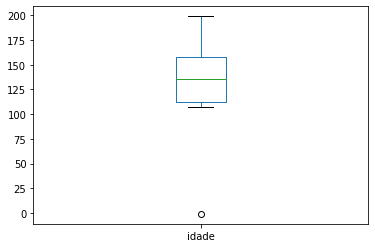

In [16]:
amostra['idade'].plot.box()

### Intervalo Interquartílico

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como um intervalo de valores tipicamente assumidos pelas observações. 


In [17]:
amostra['idade'].quantile(q=0.75) - amostra['idade'].quantile(q=0.25)

45.5

### Moda

A **moda** é o valor que ocorre com **mais frequencia** em um conjunto de dados 

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete 

- unimodal: Quando existe apenas um valor repetido com maior frequência 

- bimodal- quando existem dois valores com a mesma frequência




In [203]:
amostra.loc[0] = 10

In [204]:
amostra['idade'].mode()

0     10
1    107
2    112
3    114
4    131
5    141
6    146
7    162
8    165
9    199
dtype: int64

## Medidas de Dispersão

Medidas de variabilidade indicam o quanto as observações variam ao redor da medida de centralidade. Em outras palavras, indicam o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável. Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

### Amplitude

A amplitude é a diferença entre o maior e o menor valor observado. Esta medida de variabilidade é fortemente influenciada por valores extremos nas observações, como outliers. 

In [207]:
max(amostra['idade'])-min(amostra['idade'])


189

In [208]:
amostra.idade.max() - amostra.idade.min()

189

In [209]:
amostra['idade'].max() - amostra['idade'].min()

189

### Variância 

- *Exemplo*: suponha que você precisa de uma maquina que fabrique parafusos com 5cm de comprimento, e receba proposta de duas empresas interessadas em te vender uma maquina de fazer parafusos

- - aqui são os resultados das duas maquinas :

$$ MAQUINA_1 = [3,3,5,7,7] $$

$$ MAQUINA_2 = [4,4,5,6,6] $$

qual das duas maquinas você compraria ? 


###  *Cálculo da variância* 
- - Quanto os valores se afastam da média ?

**Formula** :

$$ \sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n-1}$$

In [24]:
maquina1 = np.array([3, 3, 5, 7, 7])
maquina2 = np.array([4, 4, 5, 6, 6])

In [214]:
maquina1.mean()

5.0

In [215]:
maquina2.mean()

5.0

In [229]:
def variancia(arr):
    media = arr.mean()
    return sum([((arr - media)**2)/(len(arr)-1) for item in arr])

def variancia(arr):
    return sum((arr - np.mean(arr))**2)/(len(arr)-1)

In [221]:
print('---------------maquina 1---------------')
print(maquina1)
print('var -',variancia(maquina1))
print('mean -',maquina1.mean())
print('---------------maquina 2---------------')
print(maquina2)
print('var -',variancia(maquina2))
print('mean -',maquina2.mean())

---------------maquina 1---------------
[3 3 5 7 7]
var - 4.0
mean - 5.0
---------------maquina 2---------------
[4 4 5 6 6]
var - 1.0
mean - 5.0


In [230]:
#pandas
pd.DataFrame(maquina1, columns=['maquina1'])['maquina1'].var()

4.0

In [231]:
pd.DataFrame(maquina2, columns=['maquina2'])['maquina2'].var()

1.0

### Assimetria

[skew](https://pyshark.com/skewness-in-python/)

É o **grau de desvio ou afastamento** da simetria de uma distribuição.Quando a curva é simétrica, a `média`,e a `mediana` e a moda coincidem,num mesmo ponto, de ordenada máxima, havendo um perfeito equilíbrio na distribuição. Quando o equilíbrio não acontece, isto é, a média, a mediana e a moda recaem em pontos diferentes da distribuição esta será assimétrica; enviesada a direita ou esquerda.

<img src="../images/assimetria.png" width="700" height="700"/>

- - Distribuição assimétrica **Negativa ou enviesada a esquerda** - quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- - Distribuição assimétrica **Positiva ou enviesada a direita** quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

Ex :

$$[14,14,15,16,42] $$ 
- `42` valor descrepante que faz com que a média > mediana (**assimetria positiva**)

$$[0,14,15,16,16] $$ 
- `0` valor descrepante que faz com que a média < mediana (**assimetria negativa**)


In [235]:
df = pd.DataFrame({'x':[14,14,15,16,42], 'y':[0,14,15,16,16]})
df

,x,y
0,14,0
1,14,14
2,15,15
3,16,16
4,42,16


In [236]:
print(df['x'].mode())
print(df['x'].median())
print(df['x'].mean())

0    14
dtype: int64
15.0
20.2


In [241]:
df.skew()

x    2.210608
y   -2.156505
dtype: float64

In [239]:
print(df['y'].mode())
print(df['y'].median())
print(df['y'].mean())

0    16
dtype: int64
15.0
12.2


In [242]:
from scipy.stats import skew

skew([14,14,15,16,42], bias=False)


2.210607778465237

In [96]:
skew([0,14,15,16,16])

-1.446627734887025

In [95]:
skew(np.random.normal(0, 2, 100000))

-0.0054388452957245545

### Exercícios
*1-Descreva as seguintes variáveis abaixo como  qualitativa nominal/ ordinal ou quantitativa: discreta/ contínua*

*a-Considere uma amostra K de 3 elementos: k+1,2k, e 101. Para quais valores de K a mediana dessa amostra é igual a média* 

- - [1]

- - [50]

- - [15]

- - [23]

- - [100]

- - [67]

- - [34]

*b-Para quais valores de k(k+1,2k,101) tem exatamente uma moda. Selecione todos corretos*

- - [1]
- - [2]
- - [3]
- - [100]

*c-Para K=50 e a amostra k(k+1,2k,101), qual afirmação seguinte é verdadeira*

- - [media > mediana]

- - [mediana > media]


In [251]:
import pandas as pd
import numpy as np
def media(lista):
    soma = 0
    for item in lista:
        soma += item
    return soma/len(lista)

def monta_lista(k):
    arr = [k+1, 2*k, 101]
    return arr

df = pd.DataFrame({'x':monta_lista(23)})
print(df['x'].median() == df['x'].mean())

False


In [252]:
def problemaA(k):
    return k+1, 2*k, 101

alternativas = [1, 50, 15, 23, 100, 67, 34]

for i in alternativas:
    lista = problemaA(i)
    if np.mean(lista)==np.median(lista):
        print(i)

67
34


In [253]:
len(pd.Series([1, 1, 1, 2, 4, 2]).mode()) == 1

True

In [259]:
def apenas_uma_moda(k):
    lista1 = k*np.array([k+1, 2*k, 101])
    if pd.Series(lista1).mode().shape[0] == 1:
        print(k)

for i in [1, 2, 3, 100, 50]:
    apenas_uma_moda(i)

1
100


In [262]:
k=50
lista1 = k*np.array([k+1, 2*k, 101])
print(np.median(lista1))
print(np.mean(lista1))

5000.0
4200.0


# Tabela de dados

Os dados brutos que trabalharemos nas duas primeiras aulas se chama Titanic. É uma base pública disponibilizada no kaggle.com em csv

In [263]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv ('../datasets/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## O que temos nessa tabela?

**PassengerId:**  Identificação do passageiro. Numerados sequencialmente de 1 a 891  
**Survived:** Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim  
**Pclass:** Classe na qual o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe  
**Name:** Nome do passageiro  
**Sex:** Sexo do passageiro  
**Age:** Idade do passageiro  
**SlbSp:** Informa a quantidade de irmãos e cônjuges que o paciente possuía na embarcação  
**Parch:** Quantidade de crianças e idosos (pais) relativos ao passageiro  
**Ticket:** Código de identificação da passagem  
**Tarifa:** Valor da passagem  
**Cabin:** Identificação da Cabine  
**Embarque:** Local onde o passageiro embarcoum

In [264]:
#### Quais variáveis você tiraria a média 
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tabelas de Frequência

A distribuição de frequências é um agrupamento de dados em classes, de tal forma que contabilizamos o número de ocorrências em cada classe. O número de ocorrências de uma determinada classe recebe o nome de frequência absoluta. O objetivo é apresentar os dados de uma maneira mais concisa e que nos permita extrair informação sobre seu comportamento. A seguir, apresentamos algumas definições necessárias à construção da distribuição de frequências.

**Frequência absoluta (ƒi):** É o número de observações correspondente a cada classe. A frequência absoluta é, geralmente, chamada apenas de frequência.

**Frequência relativa (ƒri):** É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências (total observado), isto é, $ \displaystyle f_{ri}=\frac{f_i}{\sum_{j}f_j} $ onde n representa o número total de observações.

**Frequência percentual (pi):** É obtida multiplicando a frequência relativa por 100%.

**Frequência acumulada:** É o total acumulado (soma) de todas as classes anteriores até a classe atual. Pode ser: frequência acumulada absoluta (Fi), frequência acumulada relativa (Fri), ou frequência acumulada percentual (Pi).




In [268]:
pd.crosstab(index=df["Survived"], 
                           columns=df["Sex"],margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [271]:
my_tab = pd.crosstab(index=df["Survived"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab



col_0,count
Survived,
0,549
1,342


## Exercicio

1. Complete as tabelas de frequencia com frequencia relativa e frequência acumulada:
 - - 1.a)
 
| Sobreviveu ?         | contagem | Fri | Fr acumulada | 
|----------------------|----------|-----|--------------|
|                      |          |     |              |
|                      |          |     |              | 






 - - 1.b)
 
 
| Classe do passageiro | contagem | Fri | Fr acumulada | 
|----------------------|----------|-----|--------------|
|                      |          |     |              | 
|                      |          |     |              |  
|                      |          |     |              |   

In [310]:
for i in range(len(my_tab['Fri'])):
    print(sum(my_tab['Fri'][0:i+1]))

0.6161616161616161
1.0


In [316]:
my_tab.sum()

Contagem        891.000000
Fri               1.000000
Fr A              1.616162
Fr Acumulada      1.616162
dtype: float64

In [319]:
my_tab.T

,Morreu,Sobreviveu,Total,Total 2
Contagem,549.000000,342.000000,891.000000,891.000000
Fri,0.616162,0.383838,1.000000,1.000000
Fr A,0.616162,1.000000,1.616162,1.616162
Fr Acumulada,0.616162,1.000000,1.616162,1.616162


In [318]:
my_tab = pd.crosstab(index=df["Survived"],  # Make a crosstab
                              columns="count")      # Name the count column


nova_lista = ['Morreu', 'Sobreviveu']
my_tab.index = nova_lista

# my_tab.rename(columns={'count':'contagem'}, inplace=True)
my_tab.columns = ['Contagem']


my_tab['Fri'] =  my_tab['Contagem']/my_tab['Contagem'].sum()
my_tab['Fr A'] = my_tab['Fri'].cumsum()
my_tab['Fr Acumulada'] = [sum(my_tab['Fri'][0:i+1]) for i in range(len(my_tab['Fri']))]

my_tab.loc['Total'] = my_tab.sum()
my_tab.loc['Total 2'] = (my_tab.T['Morreu'] + my_tab.T['Sobreviveu'])


my_tab

,Contagem,Fri,Fr A,Fr Acumulada
Morreu,549.0,0.616162,0.616162,0.616162
Sobreviveu,342.0,0.383838,1.000000,1.000000
Total,891.0,1.000000,1.616162,1.616162
Total 2,891.0,1.000000,1.616162,1.616162


In [312]:
my_tab = pd.crosstab(index=df["Pclass"],  # Make a crosstab
                              columns="count")      # Name the count column


nova_lista =  ["class1","class2","class3"]
my_tab.index = nova_lista

# my_tab.rename(columns={'count':'contagem'}, inplace=True)
my_tab.columns = ['Contagem']


my_tab['Fri'] =  my_tab['Contagem']/my_tab['Contagem'].sum()
my_tab['Fr A'] = my_tab['Fri'].cumsum()
my_tab['Fr Acumulada'] = [sum(my_tab['Fri'][0:i+1]) for i in range(len(my_tab['Fri']))]

my_tab

,Contagem,Fri,Fr A,Fr Acumulada
class1,216,0.242424,0.242424,0.242424
class2,184,0.206510,0.448934,0.448934
class3,491,0.551066,1.000000,1.000000


## Tabela de dupla entrada ou contigência

In [333]:
# tabela de sobreviventes por sexo 

survived_sexo = pd.crosstab(index=df["Survived"], 
                           columns=df["Sex"],margins=True)
# survived_sexo
survived_sexo.index= ["morreu","sobreviveu","Total"]
# survived_sexo
#### lembrar 
# survived_sexo.reset_index(drop=True)

# survived_sexo['Sex']
survived_sexo/survived_sexo.loc["Total"]
# survived_sexo

Sex,female,male,All
morreu,0.257962,0.811092,0.616162
sobreviveu,0.742038,0.188908,0.383838
Total,1.000000,1.000000,1.000000


# Visualização de dados

##  Histograma

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

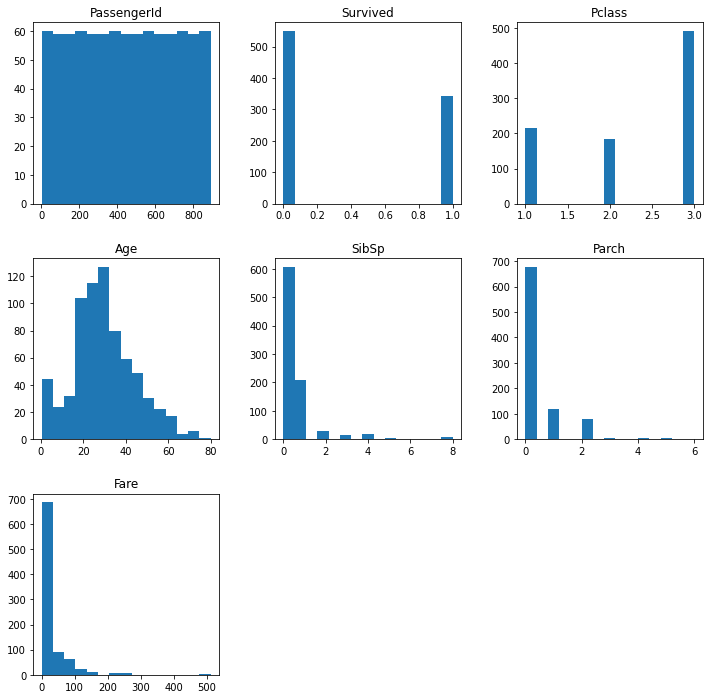

In [104]:
import seaborn as sns

df.hist(bins=15,figsize=(12,12),grid=False)

In [105]:
print('media - ', df["Age"].mean())
print('mediana - ', df["Age"].median())
print('moda - ', df["Age"].mode())

media -  29.69911764705882
mediana -  28.0
moda -  0    24.0
dtype: float64


In [106]:
Q1 = df["Age"].quantile(0.25)
Q2 = df["Age"].quantile(0.5)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q2, Q3, IQR)

20.125 28.0 38.0 17.875


In [116]:
#filtrar outliers

### Exercicio
Faça um grafico por sexo e por classe usando seaborn com a contagem de sobreviventes e não sobreviventes

Eixo x do gráfico representa as tags "Sobreviveu"/"Nao Sobreviveu"

Eixo y é a contagem

## Boxplots

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo

Limite inferior: $ \max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\} $.

Limite superior: $ \min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\} $.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

![boxplot](../images/Elements_of_a_boxplot_pt.svg)

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.

In [121]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

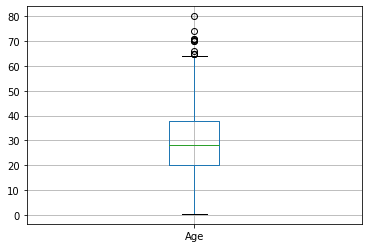

In [122]:
df.boxplot(column="Age")

Text(0.5, 0.98, 'Sobrevivente por sexo , Idade e preço do ticket')

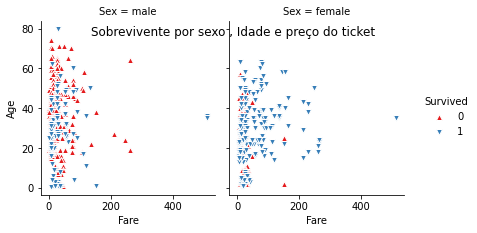

In [123]:
g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))

g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()


plt.subplots_adjust(top=1)
g.fig.suptitle('Sobrevivente por sexo , Idade e preço do ticket')

# Probabilidade

## Espaço amostral

**definição**: Chamamos de espaço amostral ao conjunto de todos os resultados possíveis de um certo fenômeno aleatório. Ele é muitas vezes representado pela letra grega $\omega$. Os subconjuntos de $\omega$ são denominados eventos e representados pelas letras latinas maiúsculas A,B ... . O conjunto vazio é denotado por $\emptyset$.

A união de dois eventos A e B, denotado por A U B representa a ocorrência de pelo menos um dos eventos A ou B. A intersecção do evento A com B, denotado por $A \cap B$ é a ocorrência simultanea de A e B 

Dois eventos A e B são disjuntos ou mutualmente exclusivos quando não têm elemento em comum. Isto é, $A \cap B$ =  $\emptyset$.


Dizemos que A e B são complementares se sua união é o espaço amostral e sua intersecção é vazia. O complementar de A será representado por $A^{c}$

<center><img src="../images/conjuntos.png" width="300" height="350" /></center>

**Definição 2.1: Probabilidade**

    Podemos definir então uma função P(.) denominada probabilidade se satisfaz as seguintes condições :
    
* * $0 \leq P(A) \leq 1$ 


* * $ P(\omega)=1$

* * $ P(\cup A_{j})= \sum_{j=1}^{n}P(a_{j})$



 **Como definir probabilidade aos elementos do espaço amostral ?**

A primeira consiste na atribuição de probabilidades. Por exemplo, baseando-se em características teóricas da realização do fenômeno. Por exemplo, ao lançarmos um dado, temos o espaço amostral $\omega={1,2,3,4,5,6}$. Admitindo que o dado foi construído de forma homogênea e com medidas rigorosamente simétricas , não temos nenhuma razão para privilegiar essa ou aquela face. Assim consideramos p(1)=p(2)=p(3)... 

**Exemplo:** 

    1.1 -lançamos uma moeda duas vezes, se C indicar cara e R indicar coroa então temos um espaço amostral:
    
$$\omega=[CC,CR,RC,RR]$$


    Se designarmos por A o evento que consiste na obtenção de face iguais nos dois lançamentos, então : 

$$ P(A) = P(CC,RR) = 2/4 $$ 

    1.2 - Uma Fábrica que produz determinado artigo. Da linha de produção são retirados 3 artigos, e cada um é classificado como bom (B), ou defeituoso (D). Um espaço amostral do experimento é:
    
$$ \omega = [BBB,BBD,BDB,DBB,DDB,DBD,BDD,DDD] $$


    Se A seja Designar o evento que consiste em obter dois artigos defeituosos:
    
$$ P(A) = P(2\ artigos\ defeituosos) = P(BDD, DBD, DDB, DDD) = 4/8 = 1/2 $$
    
    1.3 Considere o experimento que consiste em retirar uma lâmpada de um lote e medir seu tempo de vida antes de queimar. Um espaço amostral conveniente será :
    
$$ \omega = [ t \quad : 0 \leq t] $$


[Sets](https://snakify.org/en/lessons/sets/)

In [124]:
A = {1, 2, 3, 4}
B = {4, 5, 6, 7, 8}

In [125]:
l = [1, 2, 3, 4]
l2 = [4, 5, 6, 7, 8]

In [126]:
list(set(l).intersection(set(l2)))

[4]

In [127]:
A.union(B)

{1, 2, 3, 4, 5, 6, 7, 8}

## Problema: 
Crie um dicionario com o lançamento de dois dados onde a chave são os valores do dado e o valor é a soma dos dados

Obs: o dicionario deve estar ordenado da menor soma para a maior

Exemplo:
```
dado 1 -> 2
dado 2 -> 5
```
dict = {(2, 5): 7}

In [143]:
# ordene o dicionario do menor n para o maior

In [ ]:
# Faça um graficos de barra dessa distribuição

<AxesSubplot:>

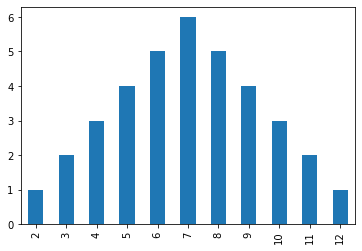

## Exercícios
* *1-Lance um dados até que a face 5 apareça pela primeira vez. Enumere os possíveis resultados:*

* *2-Uma urna contém 10 bolas azuis, 10 bolas vermelhas,com dimensões rigorosamente iguais 3 bolas são selecionadas ao acaso com reposição e as cores são anotadas* 

* *3- Uma moeda é lancada consecutivamente até o aparecimento da primeira cara* 

* *4 - dois dados são lançados simultaqneamente e estamos interessados na soma das faces obtidas*

* *5 - tres jogadores A<B<C disputam um torneio de tênis. Inicialmente, A joga com B e o vencedor joga com C, e assim por diante. O torneio termina quando um jogador ganha 2 vez em seguida ou quando são disputadas, ao todo, quatro partidas. Quais são os resultados possíveis do torneio?*

* *6 - em uma entrevista telefônica com 250 assinantes, anota-se o número se o proprietário tem ou não maquina de lavar roupa*

* *7 - de um grupo de 5 pessoas(A,B,C,D,E) são sorteadas 2 pessoas, uma apos a outra, com reposição e anota-se a configuração formada*

* *8 - Uma moeda e um dado são lançados. Dê o espaço amostral do experimento*

## Propriedades (união e intersecção)

Vamos supor a tabela abaixo  para idades

| idade | $n_{i}$ | $F_{i}$ | $f_{ac}$ |
|-------|---------|---------|----------|
| 17    | 9       |         |          |
| 18    | 22      |         |          |
| 19    | 7       |         |          |
| 20    | 4       |         |          |
| 21    | 3       |         |          |
| 22    | 0       |         |          |
| 23    | 2       |         |          |
| 24    | 1       |         |          |
| 25    | 2       |         |          |
|-------|---------|---------|----------|
| total |   n=50  |    1    |          |
|-------|---------|---------|----------|

Qual nosso espaço amostral ? 

quais são as probabilidades associadas ?

P(17) ? 

### Probabilidade de união de eventos

A probabilidade de união de eventos é calculada através da regra da adição de probabilidades apresentada abaixo :

$$ P( A U B) = P(A) + P(B) - P ( A \cap B) $$

Temos também a definição de que um evento pode ser definido pela não ocorreência dele 

$$ A^{c}$$ 

- é a não ocorrência de A 

**logo :**

$$ P(A) = 1 - P(A^{c}) $$


Se isso é correto $P(A) + P(A^{c}) = 1$


Podemos visualizar por :

$$P (A  U A^{c}) = P(A) + P(A^{c}) - P(A\cap A^{c}) $$

### Probabilidade Condicional e Independência 

![venn](../images/venn.gif)

Para eventos dependentes, o cálculo da Probabilidade muda. Vamos estabelecer que:

$P(A|B)$ -> Probabilidade condicional de A dado B, ou seja, probabilidade do evento A ocorrer, dado que ocorreu o evento B

$P(A \cap B)$ -> Como já vimos, é a probabilidade dos dois eventos ocorrerem


Para eventos dependentes, Temos a seguinte função:

$$P(A|B)= \frac{P(A \cap B)}{P(B)}$$



$$ P(A|B) = \frac{\frac{A \cap B}{\omega}}{\frac{B}{\omega}}$$



E algumas vezes, passamos P(B) para o outro lado da igualdade, e a equação fica assim:

$$P(A \cap B) = P(A|B) × P(B)$$

## 6.4. Eventos independentes 

### Exercício

Abaixo está um código para criar dados falsos sobre a quantidade de coisas que as pessoas compram, de acordo com a faixa etária.

Ele gera 100.000 "pessoas" aleatórias e as atribui aleatoriamente como tendo entre 20, 30, 40, 50, 60 ou 70 anos.

Em seguida, atribui uma menor probabilidade de os jovens comprarem coisas.

No final, temos dois dicionários Python:

"totais" contém o número total de pessoas em cada faixa etária. "compras" contém o número total de itens comprados por pessoas em cada faixa etária. O total geral de compras é total de compras, e sabemos que o número total de pessoas é 100.000.

Vamos executá-lo e dar uma olhada:




In [ ]:
random.random()

In [144]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
compras = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
total_compras = 0
for _ in range(100000):
    Decada_ano = random.choice([20, 30, 40, 50, 60, 70])
    Probabilidade_compra = float(Decada_ano) / 100.0 ## por exemplo quem nasceu na decada 20/100
    totals[Decada_ano] += 1
    if (random.random() < Probabilidade_compra):
        total_compras += 1
        compras[Decada_ano] += 1

In [145]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [146]:
compras

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [147]:
total_compras

45012

In [148]:
#Compras uniao 30 anos
compras[30]


4974

    Primeiro vamos calcular P (E | F), onde E é "compra" e F é "você está na casa dos 30 anos". A probabilidade de alguém na casa dos 30 anos comprar alguma coisa é apenas a porcentagem de quantos filhos de 30 anos compraram alguma coisa:

In [ ]:
PEF = float(compras[30]) / float(totals[30])
print('P(compras | 30s): ' + str(PEF))

In [ ]:
PF = float(totals[30]) / 100000.0
print("P(30's): " +  str(PF))

    Podemos calcular tambem a probabilidade de comprar alguma coisa:

In [ ]:
x

In [ ]:
PE = float(total_compras) / 100000.0
print("P(total_compras):" + str(PE))

    Se E e F fossem independentes, esperaríamos que P (E | F) fosse aproximadamente o mesmo que P (E). Mas eles não são; PE é 0,45 e P (E | F) é 0,3. Então, isso nos diz que E e F são dependentes (o que sabemos que são neste exemplo).

    O que é P (E) P (F)

In [ ]:
print("P(30's)P(total_compras): " + str(PF * PE))

In [ ]:
print("P(30's, compras): " + str(float(compras[30]) / 100000.0))

 $ P(E \cap F) $ é diferente de P (E | F). $P(E | F)$ seria a probabilidade de você estar na casa dos 30 anos e comprar algo da população total - não apenas a população das pessoas na casa dos 30 anos:

# Esperança

O valor esperado, ou média, ou esperança matemática é uma quantidade utilizada como resumo do comportamento de uma Variavel Aleatoria (V.A.)

A média de uma distribuição de probabilidade é a esperança de sua
variável aleatória.

A esperança de uma V.A. $X$ é obtida multiplicando-se cada valor de
$X = x_i$, $i = 1,..,n$, por sua respectiva probabilidade $P[X = x_i]$, e somando os produtos resultantes:

$E(X) = \sum_{i=1}^n x_i P[X = x_i]$

A esperança é o valor médio que esperaríamos se o experimento
continuasse sendo repetido várias vezes.

Note: o valor esperado pondera os valores assumidos pela V.A. pelas respectivas probabilidades, e o resultado não precisa ser um dos valores da variável.

A esperança está sempre compreendida entre os valores extremos da
V.A. A esperança serve como caracterização de diversas distribuições de probabilidade → parâmetro.

# Distribuições

$\binom{3}{2} = \frac{3!}{2!(3-2)!} = \frac{3*2!}{2!1!} = 3$

**Distribuição Binomial**

São n ensaios de Bernoulli com mesma probabilidade de sucesso e independentes, ou seja, o resultado de um ensaio não influencia no resultado de outro ensaio.

Exemplo: uma moeda honesta é lançada 3 vezes. Cada lançamento é independente do outro e a probabilidade de cara (sucesso) será 0,5 em todos os lançamentos.

Deste exemplo, podemos nos perguntar: dado que a moeda é lançada 3 vezes qual é a probabilidade de se obter duas caras? Indiquemos o sucesso (cara) por S e fracasso (coroa) por F. Então estamos interessados na probabilidade do evento:

A = {SSF, SFS, FSS} 

Portanto, $ P(A) = P(SSF) + P(SFS) + P(FSS) $

E, devido à independência dos eventos:

$P(SSF) = P(SFS) = P(FSS) = 0,5*0,5*0,5 = 0,125 $

Logo, $P(A) = 3*0,125 = 0,375$

Uma característica interessante é que estamos interessados apenas no número total de sucessos e não na ordem em que eles ocorrem.

Vamos designar $X$ o número total de sucessos em n ensaios de Bernoulli com probabilidade de sucesso p, $0<p<1$. Obtenhamos, agora, $P(X=k)$, ou seja, numa sequência de n ensaios de Bernoulli, a probabilidade de obter k sucessos (e, portanto n-k fracassos), $k=0,..,n$. A probabilidade de uma particular sequência de k sucessos e n-k fracassos é:

$p^k(1-p)^{n-k}$

Resta saber quantas sequências de k sucessos e n-k fracassos podemos formar. Existem $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ sequências.

Logo, $P(X=k) = \binom{n}{k} p^k(1-p)^{n-k}, k=0,..,n$

A média e a variância de uma V.A. binomial com parâmetros n e p são dadas por:

$E(X) = np$

$Var(X) = np(1-p)$

**Definição** 

A variável aleatória X, correspondente ao número de sucessos num experimento binomial, tem distribuição binomial tal que:

$b(k;n,p) = P(X=k) = \binom{n}{k} p^k(1-p)^{n-k}, k=0,..,n$

Usaremos a notação X ~ b(n,p) para indicar uma V.A. com distribuição binomial de parâmetros n e p.






$\binom{3}{0} = \frac{3!}{0!  (3-0)!} = 1$

$\binom{3}{1} = \frac{3!}{1!  (3-1)!} = 3$

$\binom{3}{2} = \frac{3!}{2!  (3-2)!} = 3$

$\binom{3}{3} = \frac{3!}{3!  (3-3)!} = 1$

$\binom{4}{0} = \frac{4!}{0!  (4-0)!} = 1$

$\binom{4}{1} = \frac{4!}{1!  (4-1)!} = 4$

$\binom{4}{2} = \frac{4!}{2!  (4-2)!} = 6$

$\binom{4}{3} = \frac{4!}{3!  (4-3)!} = 4$

$\binom{4}{4} = \frac{4!}{4!  (4-4)!} = 1$

$(a+b)^4 = (a+b)^3 (a+b) = (a+b)^2 (a+b) (a+b) = (a^2 + 2ab + b^2)(a+b) (a+b) = (a^3 + 3a^2b + 3ab^2 + b^3)(a+b) = (a^4 + 4a^3b + 6a^2b^2 + 4ab^3 + b^4)$ 

**Distribuição de Poisson**

É largamente empregada quando se deseja contar o número de eventos de certo tipo que ocorrem num intervalo de tempo.

Exemplos:

- Número de chamadas recebidas por um telefone durante 5 minutos;
- Número de falhas de um computador num dia de operação.

**Definição**

Dizemos que a V.A. N tem distribuição Poisson com parâmetro $\lambda > 0$ se:

$P(N=k) = \frac{e^{-\lambda}\lambda^k}{k!}, k=0,1,2,...$

A média e a variância de uma V.A. Poisson com parâmetro $\lambda$ são dadas por:

$E(N) = \lambda$

$Var(N) = \lambda$





**Distribuição Normal**

É representada uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.  

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.  Nela, a média, mediana e moda dos dados possuem o mesmo valor. 

![alt text](https://drive.google.com/uc?id=1tARyJcF351a8QhnQj6z4vkfkcv0FX2N-)

Usaremos a notação X ~ N($\mu$,$\sigma^2$) para representar uma V.A. com distribuição Normal de média $\mu$ e variância $\sigma^2$.

Segundo o Teorema Central do Limite, para grandes amostras, independentemente da distribuição da variável de interesse, a distribuição das médias amostrais serão aproximadamente normalmente distribuídas, e tenderão a uma distribuição normal à medida que o tamanho de amostra crescer. 

$\bar X$ ~ N($\mu$,$\frac{\sigma^2}{\sqrt{n}}$)

Sendo n = tamanho amostral.






# Teorema de Bayes
O **Teorema de Bayes** é um conceito importantíssimo da probabilidade e uma das ferramentas mais importantes de serem aprendidas para um Cientista de Dados. Este já foi usado em diversas aplicações reais, como por exemplo a classificação de um email como spam ou não. O Teorema de Bayes é uma forma calcular probabilidades condicionais de forma reversa.

Vamos considerar o clássico exemplo para explicar o teorema. Temos uma determinada doença A, e um teste T utilizado para detectar esta doença. O teste não é 100% confiável, indicando pessoas que não tem a doença como doentes (falsos positivos) e não detectando a doença em pessoas que a possuem (falsos negativos), como ilustra a figura abaixo: 


<center><img src="../images/bayes_teste.jpg" width="600" height="650" /></center>


Consideremos que 1% das pessoas possui esta doença e, logo, 99% das pessoas não a possui. O teste detecta a doença em pessoas efetivamente doentes 90% das vezes e, consequentemente, não detecta a doença em pessoas doentes em 10% dos casos. Em pessoas não doentes, o teste detecta a doença (erradamente) `em 5% dos casos` e não detecta em 95% dos casos. Podemos resumir desta forma:

|                | Pessoa Doente | Pessoa Não Doente |
|----------------|---------------|-------------------|
| Teste positivo | 90 %          | 5 %               |
| Teste Negativo | 10 %          | 95 %              |

Agora, vamos supor que você fez o teste e o resultado deu positivo. Como devemos interpretar este resultado? Obviamente, existe uma chance de você possuir a doença e uma chance de não possuir. A chance de você ter a doença e o teste detecta-la (verdadeiro positivo) é igual a chance de você ter a doença multiplicado pela chance do teste ter dado positivo corretamente. Analogamente, a chance de você não ter a doença e o teste detecta-la mesmo assim (falso positivo) é igual a chance de você não ter a doença multiplicado pela chance do teste ter dado positivo incorretamente, e assim por diante, para todos os resultados. Atualizamos então a tabela, que fica assim:

|                | Pessoa Doente                            | Pessoa Não Doente                               |
|----------------|------------------------------------------|-------------------------------------------------|
| Teste positivo | Prob Doente e teste pos: 1% × 90% = 0,9% | Prob Não Doente e teste pos: 99% × 5% = 4,95%   |
| Teste Negativo | Prob Doente e teste neg: 1% × 10% = 0,1% | Prob Não Doente e teste neg: 99% × 95% = 94,05% |

Estas então são nossas probabilidades para cada evento. Note que, se somadas, o resultado é 1, ou 100%. Mas agora temos uma dúvida. Se nosso teste deu positivo, qual a chance de termos a doença? Considerando o cálculo básico de probabilidade, temos que a chance de ter a doença é igual à chance do evento desejado dividido por todas as possibilidades. O evento desejado é um positivo verdadeiro, ou seja, teste positivo e a pessoa com doença. Para este caso, a probabilidade é de 0,9%. O total de possibilidades com relação ao teste positivo seria a soma da probabilidade de “Doente e teste pos” (verdadeiro positivo) com “Não Doente e teste pos” (falso positivo), que resultará em 0,9% + 4,95%, igual a 5,85%. Fazendo toda a conta então, nossa chance de ter a doença se temos um teste positivo é de 0,9%/5,85% = 0.1538, ou 15,38%. É uma chance bem mais baixa do que imaginamos apenas ao olhar para o problema e para a suposta precisão do teste.

**Considerando o seguinte:**

* P(D|A) = Probabilidade de ter a doença dado um teste positivo (este é a probabilidade que desejamos saber)

* P(D) = Probabilidade da pessoa ter a doença = 1%

* P(A|D) = Probabilidade de um teste positivo se a pessoa tem a doença = 0,9% (

* P(A|¬D) = Probabilidade de um teste positivo se a pessoa não tem a doença = 4,95%

    **O Teorema de bayes diz que :**
    
    
$$ P(D|A) = \frac{P(A|D) * P(D)}{P(A|D) * P(D)  + P(A|nao D) * P(nao D)}    $$

In [ ]:
# A probabilidade de uma pessoa ter certa doença A é de 1%
# consequentemente, a probabilidade de não ter a doença é de 99%

probabilidade_doenca = 0.01
probabilidade_nao_doenca = 1 - probabilidade_doenca

# Um teste T para detectar a doença não é 100% confiável, detectando
# a doença em pessoas não doentes e não detectando em pessoas doentes

# O teste detecta a doença em pessoas doentes em 90% dos casos
# e não detecta a doença em pessoas doentes em 10% dos casos

prob_teste_pos_e_doenca = 0.9
prob_teste_neg_e_doenca = 0.1

# O teste detecta a doença em pessoas não doentes em 5% dos casos
# e não detecta a doença em pessoas não doentes em 95% dos casos

prob_teste_pos_e_nao_doenca = 0.05
prob_teste_neg_e_nao_doenca = 0.95


# Verdadeiro positivo: chance de ter a doença e o teste dar positivo
prob_verdadeiro_positivo = probabilidade_doenca * prob_teste_pos_e_doenca


# Verdadeiro negativo: chance de não ter a doença e o teste dar negativo
prob_verdadeiro_negativo = probabilidade_nao_doenca * prob_teste_neg_e_nao_doenca

# Falso positivo: chance de não ter a doença e o teste dar positivo
prob_falso_positivo = probabilidade_nao_doenca * prob_teste_pos_e_nao_doenca

# Falso negativo: chance de ter a doença e o teste dar negativo
prob_falso_negativo = probabilidade_doenca * prob_teste_neg_e_doenca


(prob_teste_pos_e_doenca * probabilidade_doenca)/(prob_teste_pos_e_doenca * probabilidade_doenca + prob_falso_positivo*probabilidade_nao_doenca)
# Fizemos o teste e o resultado foi positivo. Qual a chance de eu ter a doença?
# Teorema de Bayes: P(D|A) = (P(A|D) * P(D)) / (P(A|D) * P(D) + P(A|¬D) * P(¬D))

# Testes de Correlação

<img src='../images/correlacao.png' style="weight:30%;">

## Coeficiente de correlação de Pearson
Esse coeficiente exibe uma taxa de relação linear entre duas variáveis numéricas. Quanto mais próximo de 1 ou -1, mais linearmente correlacionado estão as variáveis testadas. O teste também retorna o p-valor do teste de hipótese. Esse teste é paramétrico.

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
**Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

dados = pd.read_csv('../datasets/weight-height.csv')
h_male = dados.loc[dados['Gender']=='Male', 'Height']
w_male = dados.loc[dados['Gender']=='Male', 'Weight']
dados

In [ ]:
dados[dados['Gender'] == 'Male'].corr()

In [ ]:
pearsonr(h_male, w_male)

O coeficiente foi 0.863, muito próximo de um e o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras estão correlacionadas linearmente.

## Coeficiente de correlação de Spearman

Esse coeficiente diz se as amostras possuem correlação *monotônica*, isso é, se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir. O teste varia entre -1 e 1, sendo que 0 indica ausência de correlação; quanto mais próximo de um for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). O coeficiente de Spearman **não** indica correlação linear. Esse teste é não-paramétrico.

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.
 
**Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

In [ ]:
from scipy.stats import shapiro


In [ ]:
dados = pd.read_csv('../datasets/breast_cancer.csv')
dados.head()

In [ ]:
radius_mean = dados.loc[:, 'radius_mean']
area_mean = dados.loc[:, 'area_mean']

In [ ]:
shapiro(radius_mean)

In [ ]:
shapiro(area_mean)

Nenhuma amostra é normal. Assim, para verificarmos alguma correlação entre ambas, usaremos o coeficiente de Spearman.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
spearmanr(radius_mean, area_mean)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(radius_mean, area_mean)

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis são positivamente monotônicamente dependentes.

In [ ]:
df = pd.read_csv('../datasets/titanic.csv')
df

In [ ]:
df['Embarked'].value_counts()

In [ ]:
df.loc[df['Embarked'].isna(), 'Embarked'] = 'J'

In [ ]:
embarked_code = {'S': 1, 'C': 2, 'Q': 3, 'J':0}
df['Embarked_cat'] = df.apply(lambda row: embarked_code[row['Embarked']], axis=1)


In [ ]:
df["Embarked_cat"].value_counts()

In [ ]:
df.corr()

In [ ]:
g = sns.FacetGrid(df, hue="Survived", col="Embarked_cat", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Pclass", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=1)
g.fig.suptitle('Sobrevivente por sexo , Idade e preço do ticket')